In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import io
from google.colab import files
uploaded=files.upload()

Saving weight-height.csv to weight-height (4).csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
X=df[['Height']]
y_true=df[['Weight']].values

In [ ]:
def line(x,w=0,b=0):
  return w*x + b
def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

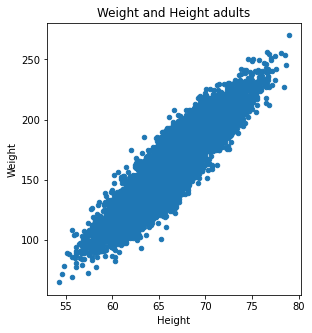

In [ ]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height adults',ax=ax1 )

Text(0.5, 0, 'b')

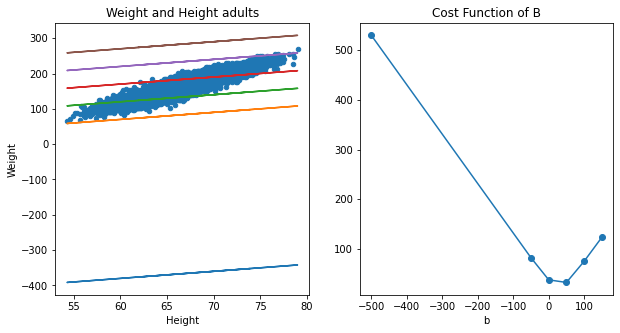

In [ ]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height adults',ax=ax1)
bs=np.array([-500,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred=line(X,w=2,b=b)
  mse=mean_squared_error(y_true,y_pred)
  mses.append(mse)
  plt.plot(X,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('Cost Function of B')
plt.xlabel('b')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Linear Regression with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam , SGD
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()

In [ ]:
X=df[['Height']]
y_true=df[['Weight']].values

In [ ]:
X

In [ ]:
X.shape

In [ ]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [ ]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 923us/step - loss: 798.5256
Epoch 2/40
313/313 [==============================] - 0s 815us/step - loss: 554.7903
Epoch 3/40
313/313 [==============================] - 0s 949us/step - loss: 493.9570
Epoch 4/40
313/313 [==============================] - 0s 994us/step - loss: 458.6407
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 395.9483
Epoch 6/40
313/313 [==============================] - 0s 965us/step - loss: 342.7118
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 323.6158
Epoch 8/40
313/313 [==============================] - 0s 910us/step - loss: 284.1977
Epoch 9/40
313/313 [==============================] - 0s 958us/step - loss: 259.8188
Epoch 10/40
313/313 [==============================] - 0s 944us/step - loss: 249.2598
Epoch 11/40
313/313 [==============================] - 0s 958us/step - loss: 224.7265
Epoch 12/40
313/313 [==============================] - 0s 948us/ste

In [ ]:
y_pred=model.predict(X)


In [ ]:
y_pred

array([[221.10318],
       [182.01413],
       [223.13351],
       ...,
       [144.09192],
       [183.96146],
       [129.24573]], dtype=float32)